In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from lib.graphs import G_Witvliet, G_White

In [2]:
G_W1 = G_Witvliet[0]
G_W7 = G_Witvliet[6]
G_W8 = G_Witvliet[7]

### Plot the distribution of connectivity between side of NR

In [3]:
NR_xVal = 44 # the x-value at which the nerve ring segments the neurons
# determined by the x coordinate of RMEV, being 44.66 and posterior to the nerve ring
# TODO: use x and y coordinates to determine never ring location
# NOTE: Given thickness of nerve ring, x direction alone should be sufficient
# NOTE: New spatial data places RID on the posterior side of the nerve ring, may need to update how nerve ring is calculated as a result

def sideOfNR(xPos):
  return 'head' if (xPos < NR_xVal) else 'tail'

In [4]:
def plotConnectionSidesNR(G):
  connectionSpread = {'head-head': 0, 'head-tail': 0, 'tail-head': 0, 'tail-tail': 0}

  for n, m in G.edges():
    nSide = sideOfNR(G.nodes[n]['x'])
    mSide = sideOfNR(G.nodes[m]['x'])
    category = nSide + '-' + mSide
    connectionSpread[category] += 1
  plt.clf()
  plt.bar(connectionSpread.keys(), connectionSpread.values())
  plt.show()

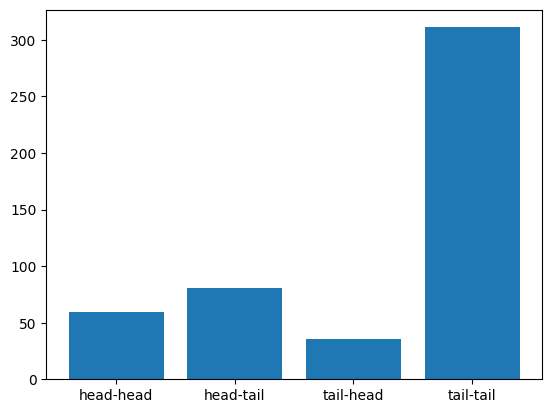

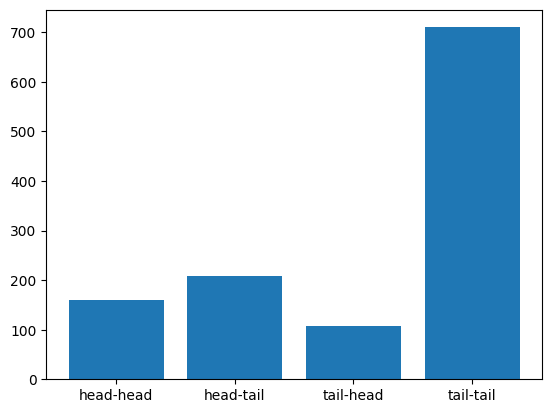

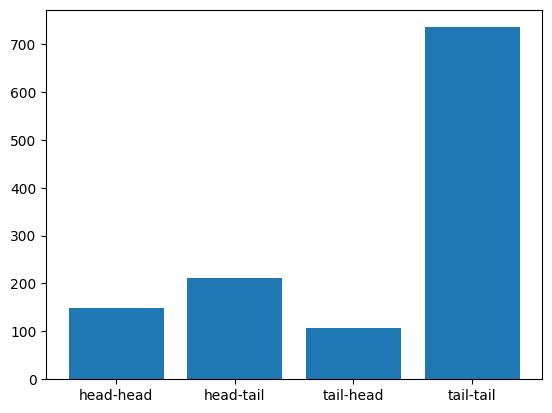

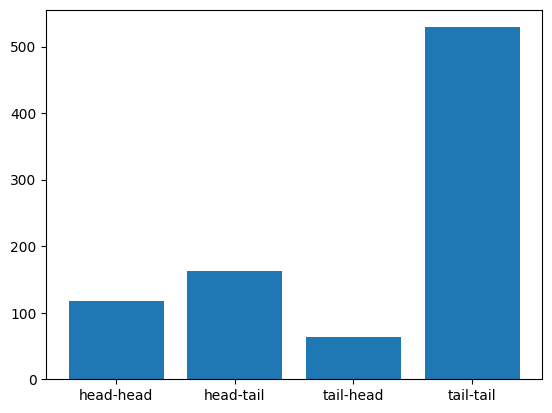

In [5]:
plotConnectionSidesNR(G_W1)
plotConnectionSidesNR(G_W7)
plotConnectionSidesNR(G_W8)
plotConnectionSidesNR(G_White)

### Plot distribution of connectivity within and outside of cell classes

In [6]:
def plotConnectionSidesClass(G):
  connectionSpread = {'interclass': 0, 'intraclass': 0}

  for n, m in G.edges():
    if n[0:3] == m[0:3]:
      connectionSpread['intraclass'] += 1
    else:
      connectionSpread['interclass'] += 1

  plt.clf()
  plt.bar(connectionSpread.keys(), connectionSpread.values())
  plt.show()

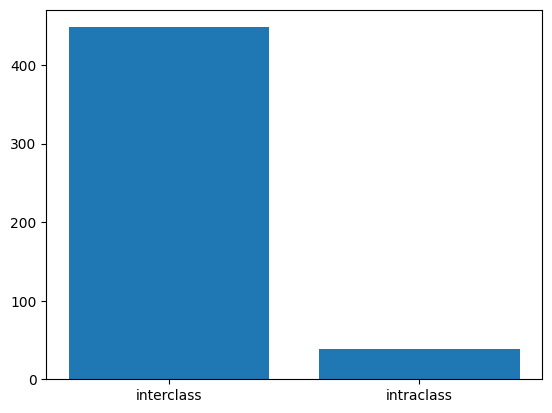

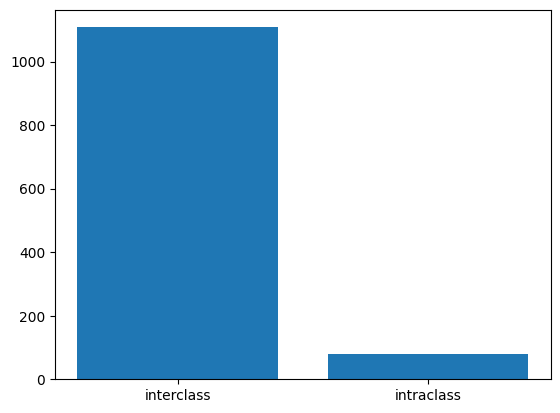

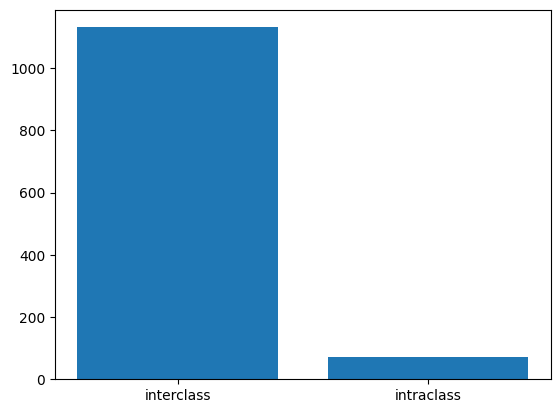

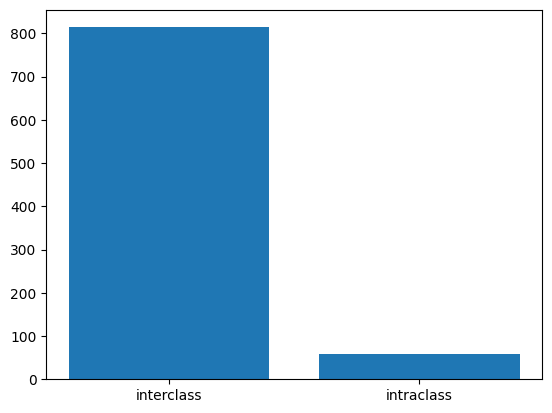

In [7]:
plotConnectionSidesClass(G_W1)
plotConnectionSidesClass(G_W7)
plotConnectionSidesClass(G_W8)
plotConnectionSidesClass(G_White)

### Apply this to Overlapping Graphs

In [8]:
%store -r G_overlap_W7_W8
%store -r G_overlap_W7_White
%store -r G_overlap_W8_White
%store -r G_overlap_W7_W8_White
%store -r G_unique_W7
%store -r G_unique_W8
%store -r G_unique_White

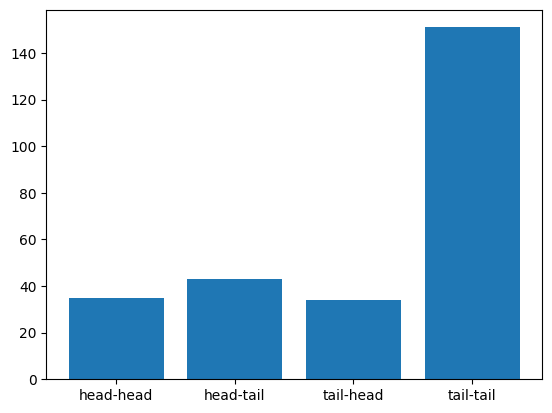

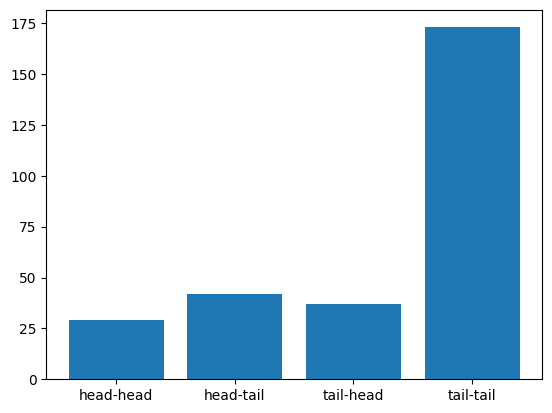

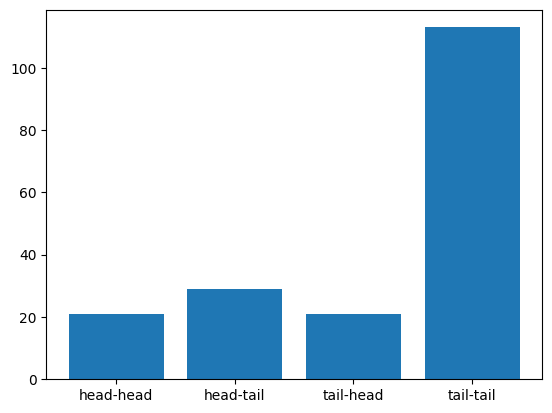

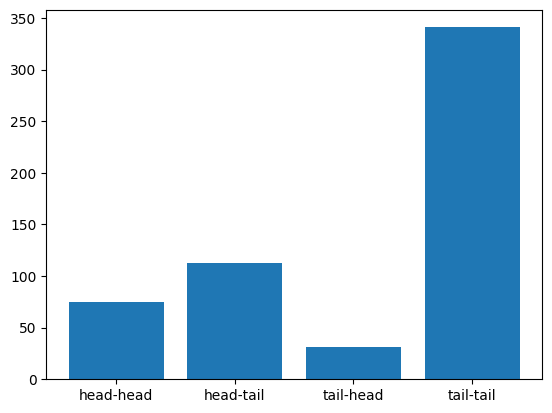

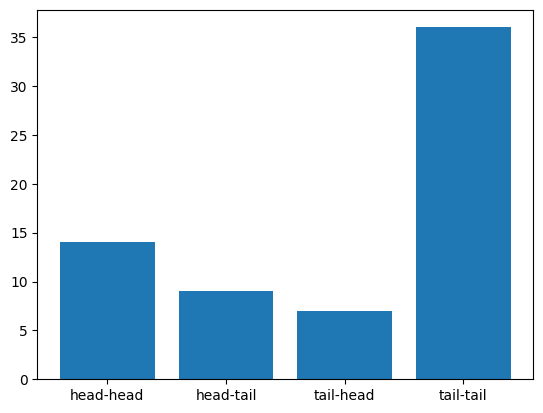

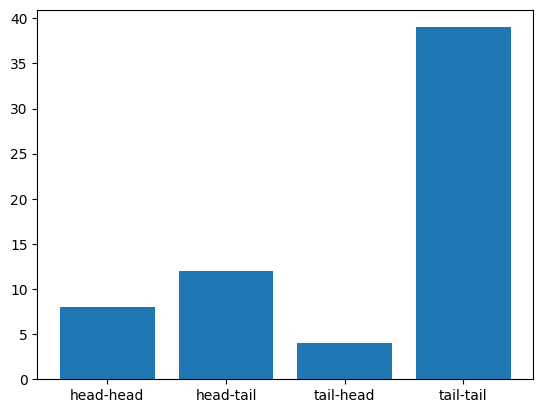

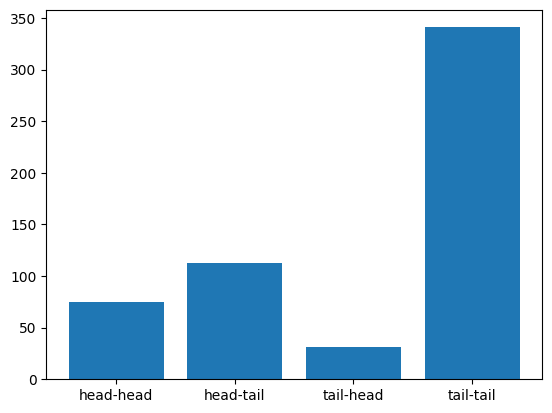

In [9]:
plotConnectionSidesNR(G_unique_W7)
plotConnectionSidesNR(G_unique_W8)
plotConnectionSidesNR(G_unique_White)
plotConnectionSidesNR(G_overlap_W7_W8)
plotConnectionSidesNR(G_overlap_W7_White)
plotConnectionSidesNR(G_overlap_W8_White)
plotConnectionSidesNR(G_overlap_W7_W8_White)

Observation: head -> tail connections are much more variable than tail -> head connections. 

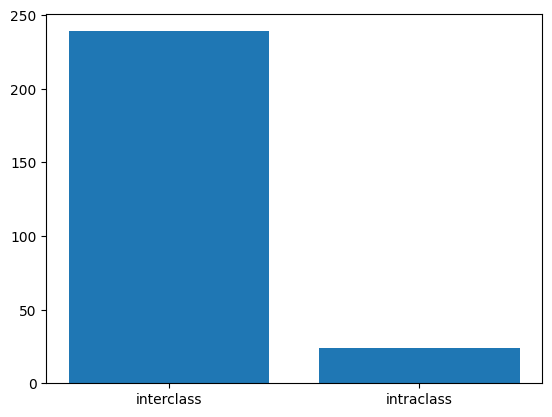

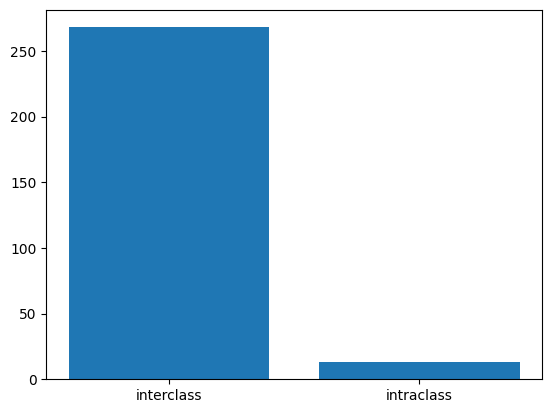

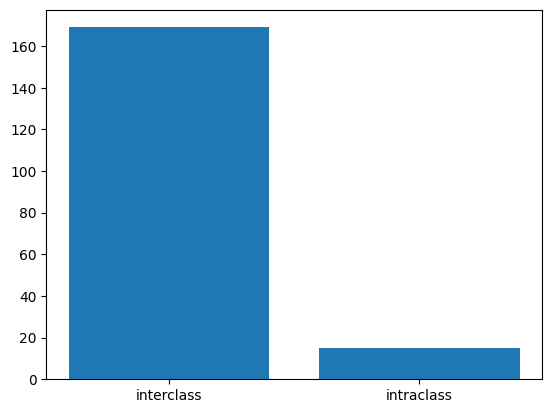

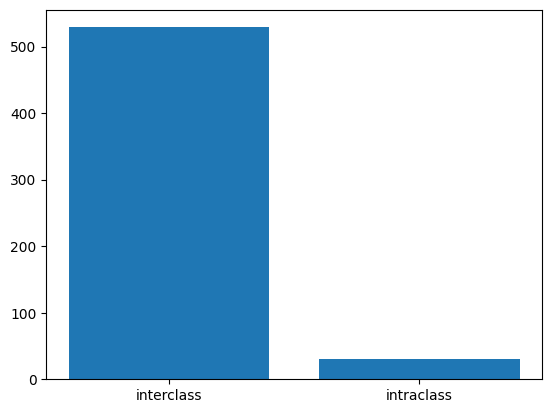

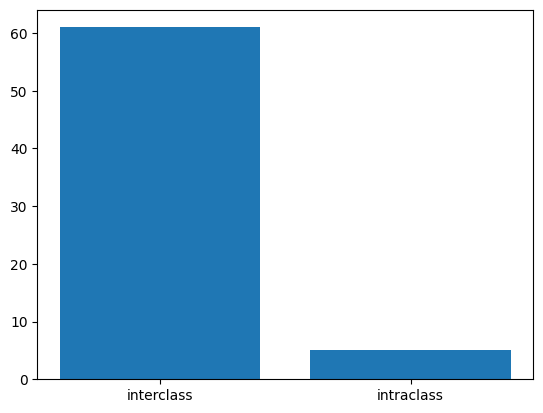

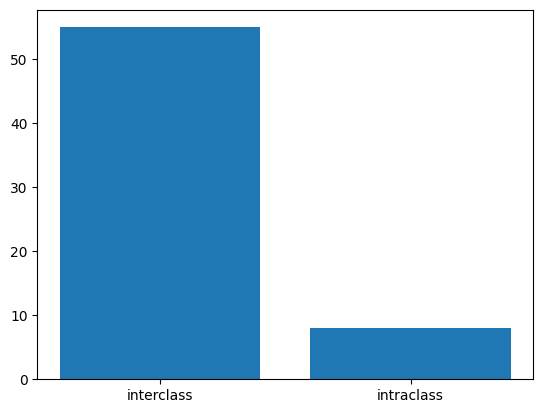

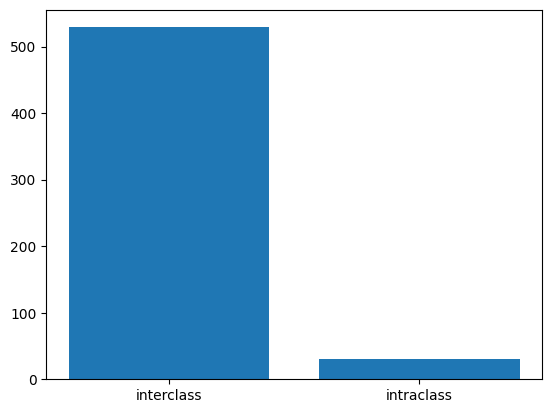

In [10]:
plotConnectionSidesClass(G_unique_W7)
plotConnectionSidesClass(G_unique_W8)
plotConnectionSidesClass(G_unique_White)
plotConnectionSidesClass(G_overlap_W7_W8)
plotConnectionSidesClass(G_overlap_W7_White)
plotConnectionSidesClass(G_overlap_W8_White)
plotConnectionSidesClass(G_overlap_W7_W8_White)

### Try this with SEEM

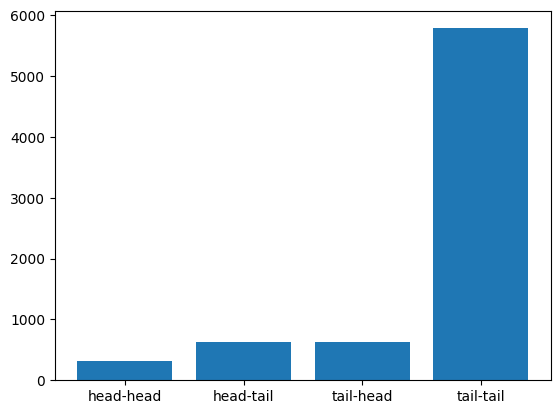

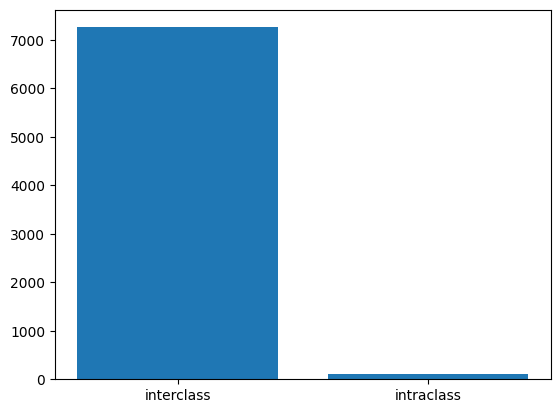

In [11]:
%store -r G_SEEM_FC
plotConnectionSidesNR(G_SEEM_FC)
plotConnectionSidesClass(G_SEEM_FC)

Observation: SEEM appears to match many of the trends found in C.E.